In [1]:
import os
import yaml
from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from mejiro.analysis import lensing
from mejiro.plots import corner
from mejiro.utils import util

# read configuration file
with open('roman_data_challenge_rung_1.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

if config['dev']:
    config['pipeline_label'] += '_dev'

In [2]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '03')

pickles = sorted(glob(os.path.join(data_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 9 pickle(s) in /nfsdata1/bwedig/mejiro/roman_data_challenge_rung_1_dev/03


In [3]:
sample_realization = util.unpickle(pickles[0])
print(sample_realization)

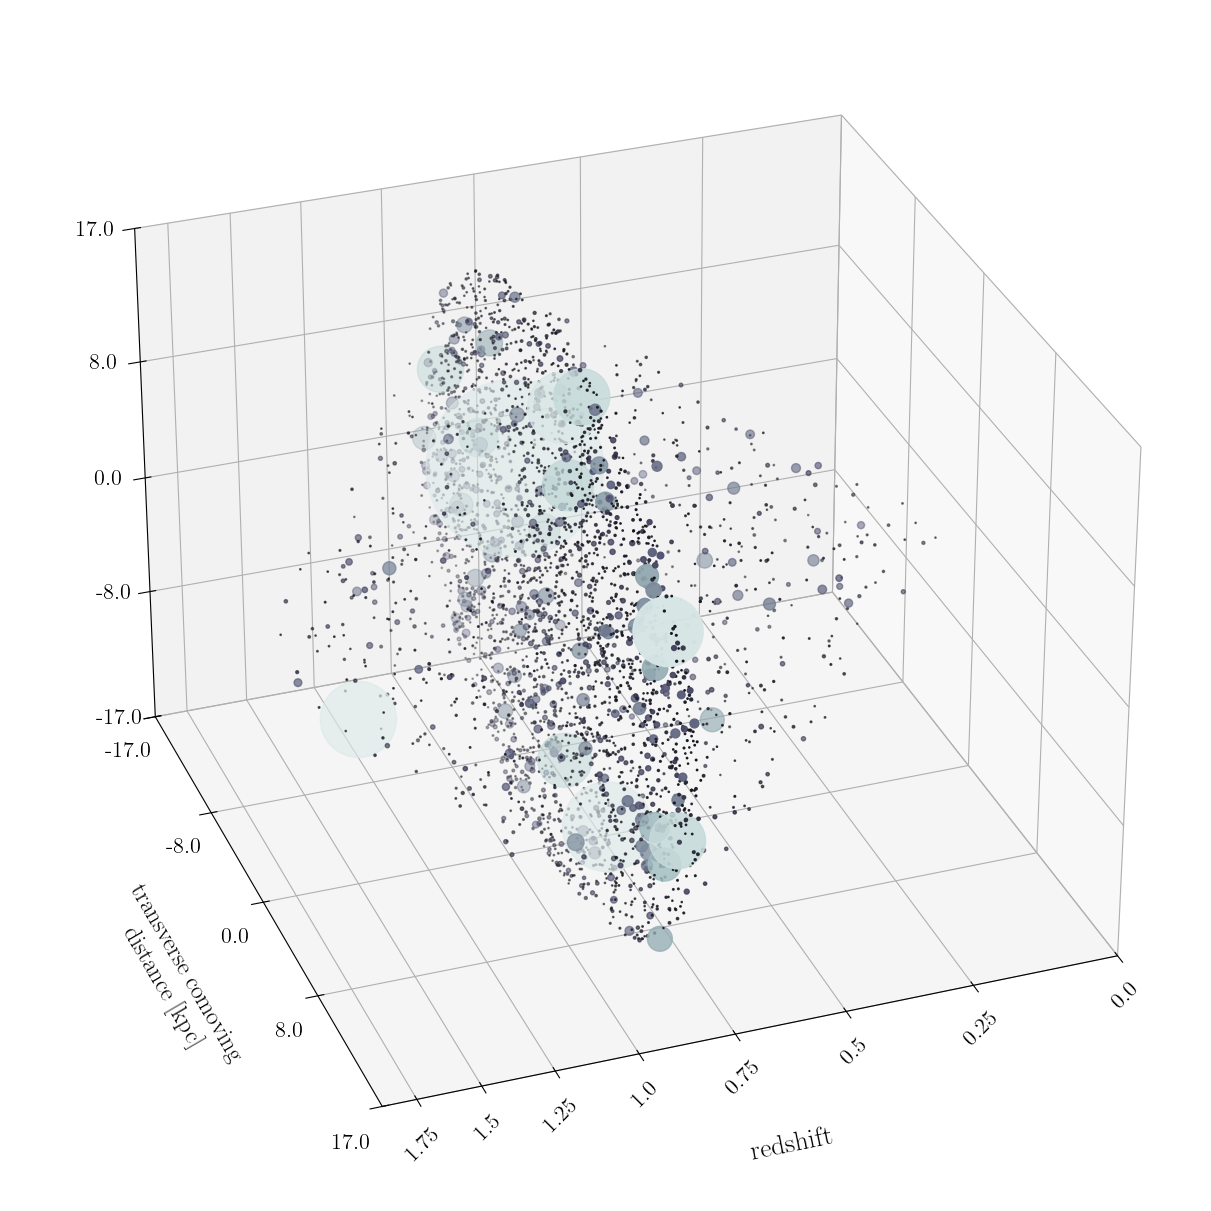

In [4]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
sample_realization.plot(ax)

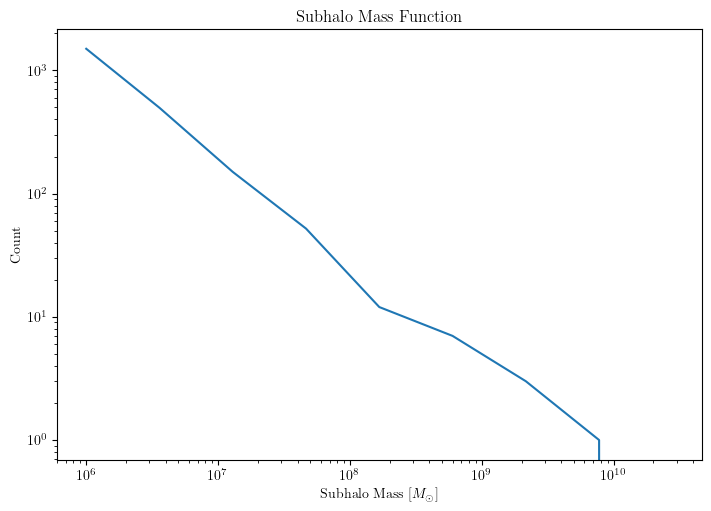

In [5]:
plt.loglog(*lensing.get_subhalo_mass_function(sample_realization))
plt.title('Subhalo Mass Function')
plt.xlabel('Subhalo Mass [$M_\odot$]')
plt.ylabel('Count')
plt.show()

In [6]:
largest_halo = max(sample_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 2.15e+10 Msun

{'_args': {},
 '_c': 5.3626094964539295,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationLudlow object at 0x7fa4e4085e40>,
 '_kwargs_lenstronomy': [{'Rs': 0.52540373,
                          'alpha_Rs': 0.01848105777348576,
                          'center_x': -0.3503,
                          'center_y': 0.3619,
                          'r_trunc': 0.3457763875350318}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7fa4e4085b40>,
 '_mbound_galacticus_definition': 2938967668.298514,
 '_nfw_params': [23417762.370797433, 4.171173021412309, 22.368372055978078],
 '_profile_args': (5.3626094964539295, 2.7450956191104265),
 '_rescale_norm': 0.7487147049780484,
 '_rescaled_once': True,
 '_time_since_infall': 4.1386614209507835,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationGalacticus object at 0x7fa4e40861d0>,
 '_z_infall': 2.8282687670588555,
 '_zeval': 2.8282687670588555,
 'fixed_position': False,
 

# Review failed systems

In [7]:
lenses = util.unpickle_all(os.path.join(data_dir, 'sca*'), prefix="lens_")
print(f'Found {len(lenses)} lens(es) in {data_dir}')

Found 18 lens(es) in /nfsdata1/bwedig/mejiro/roman_data_challenge_rung_1_dev/03


In [8]:
failed_lenses = util.unpickle_all(data_dir, prefix="failed_")
print(f'{len(failed_lenses)} failed out of {len(lenses)} systems, {len(failed_lenses) / len(lenses) * 100:.2f} percent')

1 failed out of 18 systems, 5.56 percent


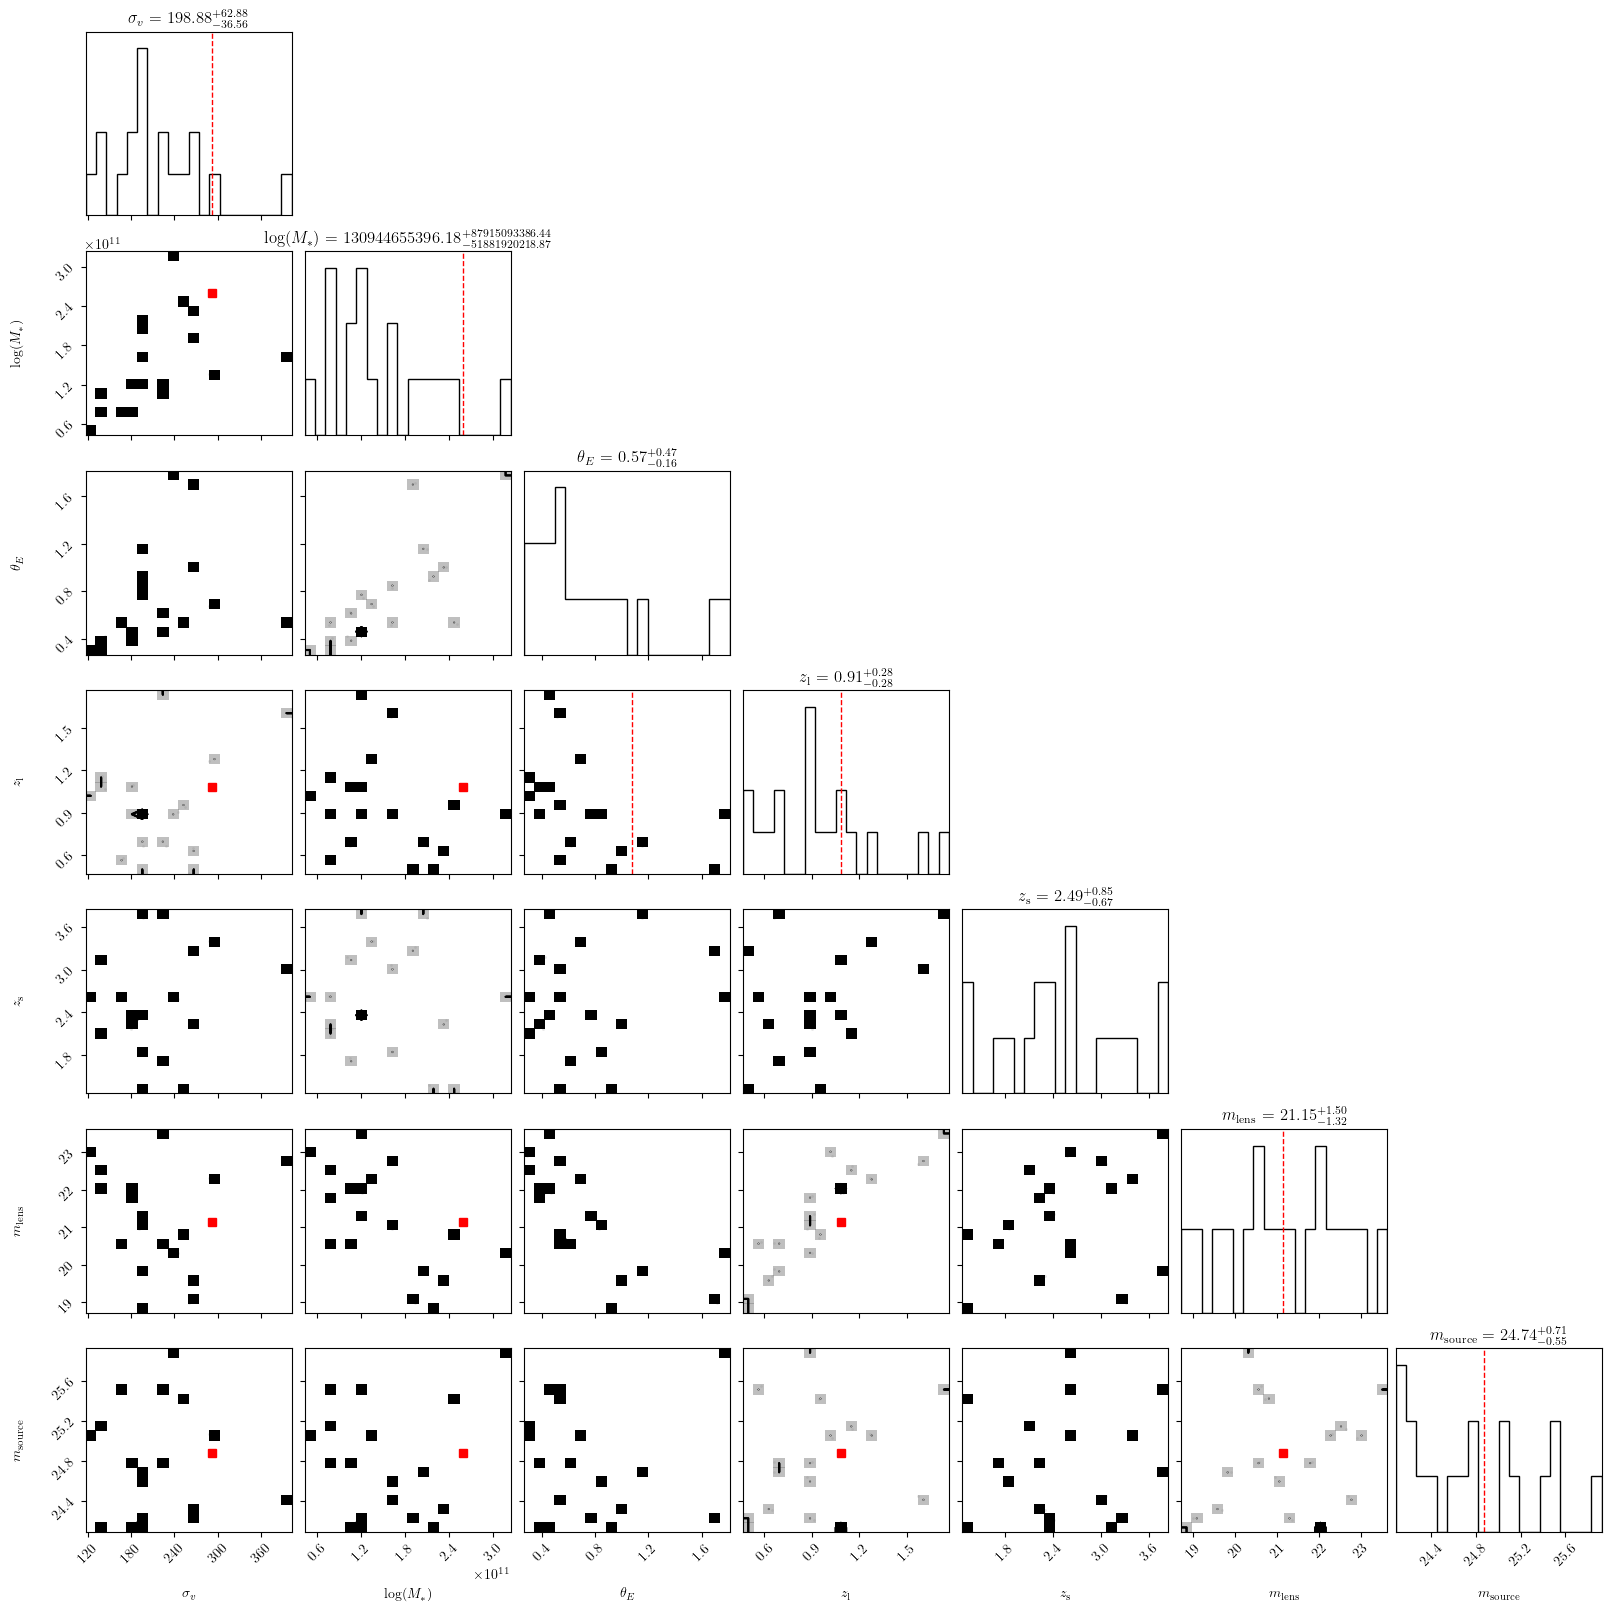

In [9]:
total_corner = corner.overview(lenses, 'F129', quantiles=None)
corner.overplot_points(total_corner, failed_lenses)